## fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
x,y=mnist['data'],mnist['target']
x.shape


(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
some_digit=x.iloc[19002]
#lets reshape it to plot
image_of_dig=some_digit.values.reshape(28,28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

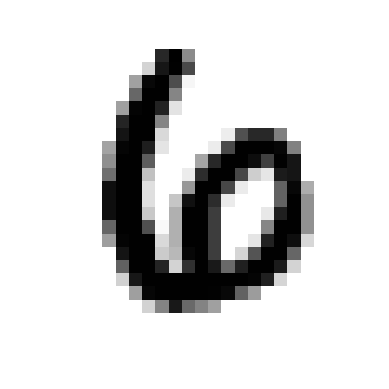

In [7]:
plt.imshow(image_of_dig, cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [8]:
y[19002]

'6'

In [9]:
x_train=x[:6000]

In [10]:
x_test=x[6000:7000]

In [11]:
y_train,y_test=y[:6000],y[6000:7000]

In [12]:
shuffle_index=np.random.permutation(6000)
x_train,y_train=x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

## Creating a 2 Detector

In [13]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [14]:
y_test_2

6000    False
6001    False
6002    False
6003    False
6004    False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Name: class, Length: 1000, dtype: bool

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
#classifier=LogisticRegression(tol=0.1)

In [17]:
#classifier.fit(x_train,y_train_2)

In [18]:
#classifier.predict([some_digit])

In [19]:
#from sklearn.model_selection import cross_val_score
#a=cross_val_score(classifier,x_train,y_train,cv=3,scoring="accuracy")

In [20]:
#a.mean()

## creating a not 2 classifier

In [21]:
y_train_Not_2=(y_train!=2)
y_test_Not_2=(y_test!=2)

In [22]:
y_test_Not_2

6000    True
6001    True
6002    True
6003    True
6004    True
        ... 
6995    True
6996    True
6997    True
6998    True
6999    True
Name: class, Length: 1000, dtype: bool

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
#classifier2=LogisticRegression(tol=0.1)
classifier2=SGDClassifier(random_state=42)
classifier2.fit(x_train,y_train_Not_2)

SGDClassifier(random_state=42)

In [24]:
classifier2.predict([some_digit])

C:\Users\india\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [25]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(classifier2,x_train,y_train_Not_2,cv=3,scoring="accuracy")

In [26]:
a.mean()

np.float64(0.961)

In [27]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(classifier2,x_train,y_train_Not_2,cv=3)

In [28]:
y_train_pred

array([ True,  True,  True, ...,  True,  True,  True])

## confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_train_Not_2,y_train_pred)

array([[ 484,   97],
       [ 137, 5282]])

## Precision and Recall

In [31]:
from sklearn.metrics import precision_score, recall_score


In [32]:
precision_score(y_train_Not_2,y_train_pred)

np.float64(0.9819669083472764)

In [33]:
recall_score(y_train_Not_2,y_train_pred)

np.float64(0.9747185827643476)

In [34]:
## f1 score

In [35]:
from sklearn.metrics import f1_score


In [36]:
f1_score(y_train_Not_2,y_train_pred)

np.float64(0.9783293202444897)

## precision recall curve

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
y_score=cross_val_predict(classifier2,x_train,y_train_Not_2,cv=3,method="decision_function")

In [39]:
y_score

array([737752.5582575 , 795376.88891535, 163947.60050298, ...,
       399923.26299091, 690614.18303859,  27021.45992628])

In [40]:
precision,recall,threshold=precision_recall_curve(y_train_Not_2,y_score)

In [41]:
precision

array([0.90316667, 0.90331722, 0.90346782, ..., 1.        , 1.        ,
       1.        ])

In [42]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.69071784e-04, 1.84535892e-04, 0.00000000e+00])

In [43]:
threshold

array([-1388662.80070364, -1338879.83073244, -1171352.28843067, ...,
        2807216.7826507 ,  2815651.87108499,  2826659.58061669])

In [44]:
import matplotlib.pyplot as plt

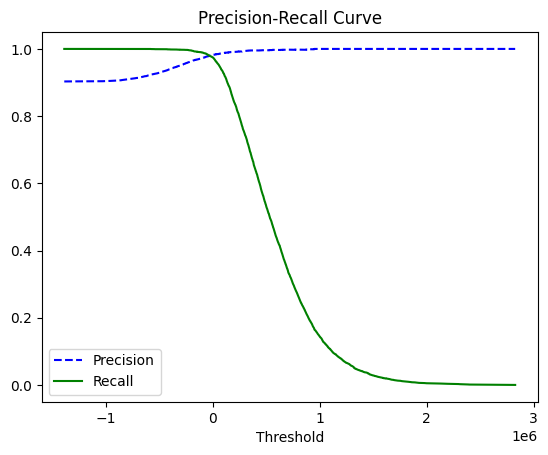

In [46]:
plt.plot(threshold, precision[:-1], "b--", label="Precision")
plt.plot(threshold, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.title("Precision-Recall Curve")
plt.show()